<a href="https://colab.research.google.com/github/masfudindc/Machine_Learning/blob/main/Week07_Praktikum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Self-Optimizing Map**

Contoh penerapan Self-Organizing Map (SOM) untuk klaterisasi menggunakan library SOMPY. Sebelum memulai, pastikan Anda telah menginstal library SOMPY. JIka dalam library tidak ditemukan SOMPY bisa menggunakan minisom. Dalam Praktikum ini akan menggunakan library MiniSom untuk implementasi SOM dengan ukuran yang lebih kecil.

In [6]:
# Instalasi SOM
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=16b4c86a18ef7b53aaba9cda09dc3e0e8d728094b77dc8b299e0551f940e511c
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [7]:
# Import Library
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

**Gunakan dataset Iris sebagai contoh**

In [8]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

**Normalisasi dataset agar nilainya berada dalam rentang yang seragam.**

In [9]:
# Normalisasi data
data = data / data.max(axis=0)

**Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM**

In [10]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

**Inisialisasi bobot SOM secara acak.**

In [11]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

**Melatih SOM dengan data menggunakan metode train_random.**

In [12]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

**Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.**

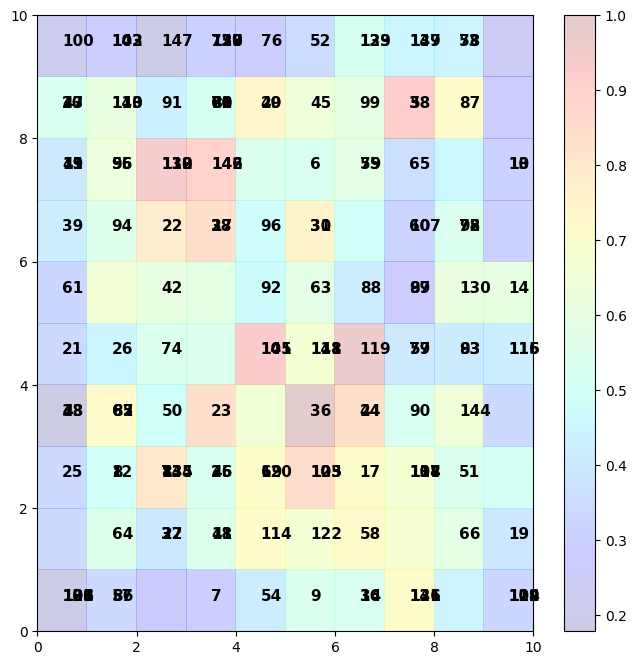

In [18]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='jet', alpha=.2)    # menggunakan color map Jet
plt.colorbar()

plt.show()